In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# img = cv.imread('full_image_kill_2.jpg', cv.IMREAD_GRAYSCALE)
# assert img is not None, "file could not be read, check with os.path.exists()"
# img2 = img.copy()
# template = cv.imread('killfeed_template_1.jpg', cv.IMREAD_GRAYSCALE)
# assert template is not None, "file could not be read, check with os.path.exists()"
# w, h = template.shape[::-1]

In [4]:
# methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
#  'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# for meth in methods:
#     img = img2.copy()
#     method = eval(meth)

#     res = cv.matchTemplate(img, template, method)
#     min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

#     if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
#         top_left = min_loc
#     else:
#         top_left = max_loc
#         bottom_right = (top_left[0] + w, top_left[1] + h)

#     cv.rectangle(img, top_left, bottom_right, 255, 2)

#     plt.subplot(121),plt.imshow(res, cmap='gray')
#     plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
#     plt.subplot(122),plt.imshow(img, cmap='gray')
#     plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
#     plt.suptitle(meth)

#     plt.show()

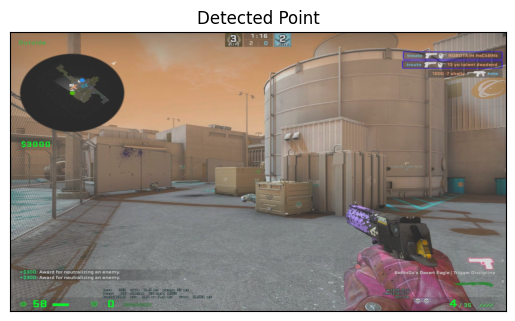

In [5]:
img_rgb = cv.imread('assets/full_image_kill_1.jpg')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
# img_gray = img_gray[0:img_gray.shape[0]//2, img_gray.shape[1]//2:] # cropping the image to the top right quadrant
template = cv.imread('assets/killfeed_template_1.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
 
res = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED) 
threshold = 0.8
loc = np.where(res >= threshold)

# pseudocode: if loc is empty, there is no match

for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)

# cv.imwrite('res.png',img_rgb)

plt.imshow(img_rgb)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()